<a href="https://colab.research.google.com/github/Usama-zia/CE888-7-SP_2021_RegNo_2010999/blob/main/Text_Analytics_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Analytics Lab 1

In [55]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
print("This works")

This works


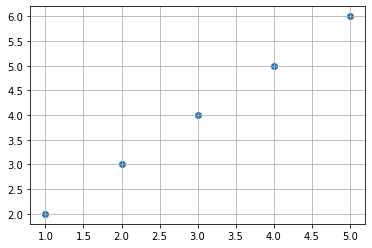

In [56]:
#Testing numpy and matplotlib

data = np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])

x = data[:,0]

y = data[:,1]

#for plotting
plt.scatter(x,y)
plt.grid(True)
plt.show()

Text Preprocessing with SciKit Learn

In [57]:
#Text Preprocessing using Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
content = ["How to format my hard disk", " Hard disk format problems "]
#fit_transform extracts features/bag of words/same words  occured in all documents or tokanize
X = vectorizer.fit_transform(content)
vectorizer.get_feature_names()
#X.toarray()
#X.toarray()[0]
#X.toarray()[1,2]from sklearn.feature_extraction.text import CountVectorizer


['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

Fetching 20newsgroups dataset

In [58]:
#fetching the data set
from sklearn.datasets import fetch_20newsgroups
#extracting subset of documents with 4 catgories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
#importing and training the documents
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
shuffle=True, random_state=42)
print("downloading is complete.")

downloading is complete.




Text Preprocessing or feature extraction on dataset


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_counts = vectorizer.fit_transform(twenty_train.data)
#vectorizer.vocabulary_.get('algorithm')
#len(vectorizer.get_feature_names())
vectorizer = CountVectorizer(stop_words='english')
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

Using NLTK for Advanced Preprocessing

In [60]:
#using nltk
import nltk
from nltk import stem
s = stem.SnowballStemmer('english')
s.stem("cats")
#tokanization
from nltk.tokenize import word_tokenize
nltk.download("punkt")
text = word_tokenize("And now for something completely different")
print("Download is complete.")
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
nltk.pos_tag(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Download is complete.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

Integrating the NLTK stemmer with SciKit’s vectorizer

In [61]:
#Integrating the NLTK stemmer with SciKit’s vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

Redefining the build_analyzer()

In [67]:
#Redefining the build_Analyzer
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer("english")
class StemmedCountVectorizer(CountVectorizer):
  def build_analyzer(self):
    analyzer = super(StemmedCountVectorizer,self).build_analyzer()
    return lambda doc: (english_stemmer.stem(w) for w in analyzer (doc))

In [72]:
#create an instance of this class
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words="english")
stem_analyze = stem_vectorizer.build_analyzer()
#stemmed version of tokens
Y = stem_analyze("John bought carrots and potatoes")
print(Y)
for tok in Y:
  print(tok)

<generator object StemmedCountVectorizer.build_analyzer.<locals>.<lambda>.<locals>.<genexpr> at 0x7f81fb61f200>
john
bought
carrot
potato


In [73]:
#using this on 20newsgroup data we get fewer features
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True,random_state=42)
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

26888